In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras import models, layers, regularizers
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import scipy.stats as stats
import urllib
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import scipy.stats
from sklearn.metrics import r2_score
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

In [2]:
np.random.seed(0)
s = 117
f= 2.8
fff=f

In [3]:
df =pd.read_excel('./Printability_map_Data_python.xlsx', sheet_name='Densification')
df.head(10)

,Laser power,Scan speed,Line spacing,Layer thickness,STMPS-Width,STMPS-Depth,STMPS-Height,AMPS-Width,AMPS-Depth,AMPS-Height,Line spacing / H_max,Keyholing,Vapor depression zone,Relative density
0,200,400,0.140,0.04,182.108333,82.940000,78.004333,211.424928,129.658,15.50,0.730037,0.613258,12.09494,97.211366
1,200,400,0.129,0.04,182.108333,82.940000,78.004333,211.424928,129.658,15.50,0.672677,0.613258,12.09494,96.486870
2,200,400,0.118,0.04,182.108333,82.940000,78.004333,211.424928,129.658,15.50,0.615317,0.613258,12.09494,98.278227
3,200,400,0.107,0.04,182.108333,82.940000,78.004333,211.424928,129.658,15.50,0.557957,0.613258,12.09494,99.268814
4,200,400,0.096,0.04,182.108333,82.940000,78.004333,211.424928,129.658,15.50,0.500597,0.613258,12.09494,96.606386
5,200,400,0.085,0.04,182.108333,82.940000,78.004333,211.424928,129.658,15.50,0.443237,0.613258,12.09494,94.637494
6,250,400,0.142,0.04,182.461667,184.457667,92.244667,233.345238,135.178,18.25,0.669424,0.579305,6.55738,98.801348
7,250,400,0.163,0.04,182.461667,184.457667,92.244667,233.345238,135.178,18.25,0.768424,0.579305,6.55738,95.357015
8,250,400,0.152,0.04,182.461667,184.457667,92.244667,233.345238,135.178,18.25,0.716567,0.579305,6.55738,77.263249
9,250,400,0.131,0.04,182.461667,184.457667,92.244667,233.345238,135.178,18.25,0.617567,0.579305,6.55738,98.072511


In [4]:
df.shape

(627, 14)

In [8]:
key = "STMPS-Width"

In [9]:
x_data = df[['Laser power', 'Scan speed', 'Line spacing','Layer thickness']] 
y_data = df[[key]].copy();
x_data

,Laser power,Scan speed,Line spacing,Layer thickness
0,200,400,0.140,0.04
1,200,400,0.129,0.04
2,200,400,0.118,0.04
3,200,400,0.107,0.04
4,200,400,0.096,0.04
...,...,...,...,...
622,500,1000,0.138,0.08
623,500,1000,0.123,0.08
624,500,1000,0.108,0.08
625,500,1000,0.078,0.08


In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu', input_shape=(4,)),
    tf.keras.layers.Dense(units = 8, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)    
])

In [32]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),loss = 'mse')

In [33]:
history = model.fit(xtrain,  ytrain, epochs = 1000, batch_size = 5, validation_split = 0.25 )

Epoch 1/1000
75/75 [==============================] - 0s 1ms/step - loss: 7558.2725 - val_loss: 1708.3833
Epoch 2/1000
75/75 [==============================] - 0s 662us/step - loss: 2468.3542 - val_loss: 3378.8135
Epoch 3/1000
75/75 [==============================] - 0s 635us/step - loss: 2375.4167 - val_loss: 3405.4741
Epoch 4/1000
75/75 [==============================] - 0s 676us/step - loss: 2322.4368 - val_loss: 2129.2009
Epoch 5/1000
75/75 [==============================] - 0s 676us/step - loss: 2056.5413 - val_loss: 1775.8147
Epoch 6/1000
75/75 [==============================] - 0s 649us/step - loss: 2480.9846 - val_loss: 2194.0081
Epoch 7/1000
75/75 [==============================] - 0s 716us/step - loss: 2209.2117 - val_loss: 2357.0955
Epoch 8/1000
75/75 [==============================] - 0s 662us/step - loss: 1882.7494 - val_loss: 1674.4576
Epoch 9/1000
75/75 [==============================] - 0s 649us/step - loss: 1947.6787 - val_loss: 1662.4957
Epoch 10/1000
75/75 [=========

75/75 [==============================] - 0s 622us/step - loss: 1161.7021 - val_loss: 1130.3584
Epoch 77/1000
75/75 [==============================] - 0s 635us/step - loss: 1160.1521 - val_loss: 1143.6403
Epoch 78/1000
75/75 [==============================] - 0s 622us/step - loss: 1185.3726 - val_loss: 1136.8328
Epoch 79/1000
75/75 [==============================] - 0s 635us/step - loss: 1185.5341 - val_loss: 1128.4698
Epoch 80/1000
75/75 [==============================] - 0s 649us/step - loss: 1165.1796 - val_loss: 1156.0573
Epoch 81/1000
75/75 [==============================] - 0s 689us/step - loss: 1159.9119 - val_loss: 1195.6772
Epoch 82/1000
75/75 [==============================] - 0s 716us/step - loss: 1175.8452 - val_loss: 1154.4340
Epoch 83/1000
75/75 [==============================] - 0s 649us/step - loss: 1159.8497 - val_loss: 1153.0043
Epoch 84/1000
75/75 [==============================] - 0s 689us/step - loss: 1161.5367 - val_loss: 1145.8240
Epoch 85/1000
75/75 [============

Epoch 151/1000
75/75 [==============================] - 0s 662us/step - loss: 1180.0482 - val_loss: 1126.5287
Epoch 152/1000
75/75 [==============================] - 0s 649us/step - loss: 1163.0438 - val_loss: 1267.2931
Epoch 153/1000
75/75 [==============================] - 0s 649us/step - loss: 1178.1923 - val_loss: 1179.6575
Epoch 154/1000
75/75 [==============================] - 0s 703us/step - loss: 1160.2349 - val_loss: 1139.2565
Epoch 155/1000
75/75 [==============================] - 0s 662us/step - loss: 1164.3862 - val_loss: 1121.4646
Epoch 156/1000
75/75 [==============================] - 0s 676us/step - loss: 1159.1475 - val_loss: 1121.6245
Epoch 157/1000
75/75 [==============================] - 0s 649us/step - loss: 1169.6071 - val_loss: 1148.4702
Epoch 158/1000
75/75 [==============================] - 0s 635us/step - loss: 1170.3951 - val_loss: 1120.9440
Epoch 159/1000
75/75 [==============================] - 0s 649us/step - loss: 1147.6752 - val_loss: 1357.3213
Epoch 160/

75/75 [==============================] - 0s 622us/step - loss: 1164.1041 - val_loss: 1204.7035
Epoch 226/1000
75/75 [==============================] - 0s 635us/step - loss: 1166.8401 - val_loss: 1120.7092
Epoch 227/1000
75/75 [==============================] - 0s 622us/step - loss: 1154.9669 - val_loss: 1163.8315
Epoch 228/1000
75/75 [==============================] - 0s 622us/step - loss: 1159.3381 - val_loss: 1145.7195
Epoch 229/1000
75/75 [==============================] - 0s 622us/step - loss: 1149.7061 - val_loss: 1125.9060
Epoch 230/1000
75/75 [==============================] - 0s 622us/step - loss: 1150.0836 - val_loss: 1121.5695
Epoch 231/1000
75/75 [==============================] - 0s 622us/step - loss: 1193.8635 - val_loss: 1191.3738
Epoch 232/1000
75/75 [==============================] - 0s 608us/step - loss: 1162.3806 - val_loss: 1156.1698
Epoch 233/1000
75/75 [==============================] - 0s 635us/step - loss: 1158.7831 - val_loss: 1124.8641
Epoch 234/1000
75/75 [===

75/75 [==============================] - 0s 635us/step - loss: 1177.6918 - val_loss: 1235.1403
Epoch 300/1000
75/75 [==============================] - 0s 622us/step - loss: 1160.9979 - val_loss: 1135.5106
Epoch 301/1000
75/75 [==============================] - 0s 635us/step - loss: 1172.7939 - val_loss: 1132.2893
Epoch 302/1000
75/75 [==============================] - 0s 622us/step - loss: 1149.3158 - val_loss: 1127.6465
Epoch 303/1000
75/75 [==============================] - 0s 622us/step - loss: 1155.8645 - val_loss: 1124.1669
Epoch 304/1000
75/75 [==============================] - 0s 649us/step - loss: 1167.0469 - val_loss: 1162.0416
Epoch 305/1000
75/75 [==============================] - 0s 608us/step - loss: 1145.5696 - val_loss: 1147.4508
Epoch 306/1000
75/75 [==============================] - 0s 635us/step - loss: 1169.2540 - val_loss: 1180.9877
Epoch 307/1000
75/75 [==============================] - 0s 608us/step - loss: 1171.0137 - val_loss: 1177.7008
Epoch 308/1000
75/75 [===

75/75 [==============================] - 0s 689us/step - loss: 1160.0553 - val_loss: 1125.7660
Epoch 374/1000
75/75 [==============================] - 0s 703us/step - loss: 1156.3901 - val_loss: 1144.4641
Epoch 375/1000
75/75 [==============================] - 0s 649us/step - loss: 1172.4851 - val_loss: 1144.0824
Epoch 376/1000
75/75 [==============================] - 0s 635us/step - loss: 1168.5781 - val_loss: 1139.4849
Epoch 377/1000
75/75 [==============================] - 0s 662us/step - loss: 1165.1466 - val_loss: 1120.9915
Epoch 378/1000
75/75 [==============================] - 0s 662us/step - loss: 1166.4374 - val_loss: 1157.3036
Epoch 379/1000
75/75 [==============================] - 0s 635us/step - loss: 1160.9476 - val_loss: 1175.2960
Epoch 380/1000
75/75 [==============================] - 0s 622us/step - loss: 1151.4053 - val_loss: 1185.6967
Epoch 381/1000
75/75 [==============================] - 0s 635us/step - loss: 1158.5253 - val_loss: 1124.0339
Epoch 382/1000
75/75 [===

75/75 [==============================] - 0s 622us/step - loss: 1172.7982 - val_loss: 1123.0698
Epoch 448/1000
75/75 [==============================] - 0s 635us/step - loss: 1148.9515 - val_loss: 1124.1362
Epoch 449/1000
75/75 [==============================] - 0s 676us/step - loss: 1155.9203 - val_loss: 1129.9972
Epoch 450/1000
75/75 [==============================] - 0s 635us/step - loss: 1184.9525 - val_loss: 1144.9213
Epoch 451/1000
75/75 [==============================] - 0s 622us/step - loss: 1147.2140 - val_loss: 1203.7809
Epoch 452/1000
75/75 [==============================] - 0s 649us/step - loss: 1150.8236 - val_loss: 1194.2225
Epoch 453/1000
75/75 [==============================] - 0s 689us/step - loss: 1165.3169 - val_loss: 1146.2443
Epoch 454/1000
75/75 [==============================] - 0s 635us/step - loss: 1163.1099 - val_loss: 1120.9039
Epoch 455/1000
75/75 [==============================] - 0s 635us/step - loss: 1160.9766 - val_loss: 1130.5471
Epoch 456/1000
75/75 [===

75/75 [==============================] - 0s 649us/step - loss: 1154.0027 - val_loss: 1142.9115
Epoch 522/1000
75/75 [==============================] - 0s 649us/step - loss: 1158.5143 - val_loss: 1124.0889
Epoch 523/1000
75/75 [==============================] - 0s 635us/step - loss: 1152.6761 - val_loss: 1125.7355
Epoch 524/1000
75/75 [==============================] - 0s 743us/step - loss: 1157.9768 - val_loss: 1121.1204
Epoch 525/1000
75/75 [==============================] - 0s 852us/step - loss: 1153.1270 - val_loss: 1132.5951
Epoch 526/1000
75/75 [==============================] - 0s 919us/step - loss: 1154.6121 - val_loss: 1178.3228
Epoch 527/1000
75/75 [==============================] - 0s 919us/step - loss: 1152.0679 - val_loss: 1148.1316
Epoch 528/1000
75/75 [==============================] - 0s 797us/step - loss: 1152.2970 - val_loss: 1157.8910
Epoch 529/1000
75/75 [==============================] - 0s 676us/step - loss: 1146.8616 - val_loss: 1123.9766
Epoch 530/1000
75/75 [===

75/75 [==============================] - 0s 622us/step - loss: 1167.0416 - val_loss: 1141.8160
Epoch 596/1000
75/75 [==============================] - 0s 662us/step - loss: 1155.2333 - val_loss: 1122.9866
Epoch 597/1000
75/75 [==============================] - 0s 662us/step - loss: 1176.1238 - val_loss: 1152.2384
Epoch 598/1000
75/75 [==============================] - 0s 703us/step - loss: 1156.0963 - val_loss: 1141.5349
Epoch 599/1000
75/75 [==============================] - 0s 662us/step - loss: 1158.2992 - val_loss: 1188.5067
Epoch 600/1000
75/75 [==============================] - 0s 662us/step - loss: 1149.5656 - val_loss: 1155.0055
Epoch 601/1000
75/75 [==============================] - 0s 649us/step - loss: 1149.8182 - val_loss: 1185.1982
Epoch 602/1000
75/75 [==============================] - 0s 635us/step - loss: 1155.4938 - val_loss: 1245.8918
Epoch 603/1000
75/75 [==============================] - 0s 622us/step - loss: 1166.1685 - val_loss: 1122.7477
Epoch 604/1000
75/75 [===

75/75 [==============================] - 0s 622us/step - loss: 1172.8452 - val_loss: 1133.2405
Epoch 670/1000
75/75 [==============================] - 0s 635us/step - loss: 1149.8651 - val_loss: 1153.5989
Epoch 671/1000
75/75 [==============================] - 0s 689us/step - loss: 1146.1726 - val_loss: 1159.0579
Epoch 672/1000
75/75 [==============================] - 0s 662us/step - loss: 1153.8334 - val_loss: 1132.4370
Epoch 673/1000
75/75 [==============================] - 0s 649us/step - loss: 1169.9891 - val_loss: 1129.6169
Epoch 674/1000
75/75 [==============================] - 0s 689us/step - loss: 1149.3931 - val_loss: 1133.3269
Epoch 675/1000
75/75 [==============================] - 0s 622us/step - loss: 1151.1388 - val_loss: 1121.1919
Epoch 676/1000
75/75 [==============================] - 0s 622us/step - loss: 1152.7850 - val_loss: 1155.7804
Epoch 677/1000
75/75 [==============================] - 0s 622us/step - loss: 1150.0128 - val_loss: 1175.1952
Epoch 678/1000
75/75 [===

75/75 [==============================] - 0s 703us/step - loss: 1144.3468 - val_loss: 1167.7686
Epoch 744/1000
75/75 [==============================] - 0s 649us/step - loss: 1153.9531 - val_loss: 1133.0364
Epoch 745/1000
75/75 [==============================] - 0s 635us/step - loss: 1149.6479 - val_loss: 1156.8855
Epoch 746/1000
75/75 [==============================] - 0s 649us/step - loss: 1152.2225 - val_loss: 1124.0483
Epoch 747/1000
75/75 [==============================] - 0s 649us/step - loss: 1150.3975 - val_loss: 1130.3282
Epoch 748/1000
75/75 [==============================] - 0s 622us/step - loss: 1152.3363 - val_loss: 1125.9907
Epoch 749/1000
75/75 [==============================] - 0s 622us/step - loss: 1153.6417 - val_loss: 1136.3744
Epoch 750/1000
75/75 [==============================] - 0s 608us/step - loss: 1153.5159 - val_loss: 1142.2164
Epoch 751/1000
75/75 [==============================] - 0s 635us/step - loss: 1152.7186 - val_loss: 1177.9423
Epoch 752/1000
75/75 [===

75/75 [==============================] - 0s 662us/step - loss: 1162.3341 - val_loss: 1132.6893
Epoch 818/1000
75/75 [==============================] - 0s 703us/step - loss: 1144.9468 - val_loss: 1165.1272
Epoch 819/1000
75/75 [==============================] - 0s 743us/step - loss: 1154.1842 - val_loss: 1136.2788
Epoch 820/1000
75/75 [==============================] - 0s 730us/step - loss: 1151.3820 - val_loss: 1121.1312
Epoch 821/1000
75/75 [==============================] - 0s 662us/step - loss: 1154.6769 - val_loss: 1144.6729
Epoch 822/1000
75/75 [==============================] - 0s 649us/step - loss: 1151.0046 - val_loss: 1122.9678
Epoch 823/1000
75/75 [==============================] - 0s 649us/step - loss: 1162.3048 - val_loss: 1172.4178
Epoch 824/1000
75/75 [==============================] - 0s 635us/step - loss: 1156.4144 - val_loss: 1120.6985
Epoch 825/1000
75/75 [==============================] - 0s 662us/step - loss: 1152.3284 - val_loss: 1145.5205
Epoch 826/1000
75/75 [===

75/75 [==============================] - 0s 676us/step - loss: 1142.1353 - val_loss: 1208.6162
Epoch 892/1000
75/75 [==============================] - 0s 622us/step - loss: 1133.6561 - val_loss: 1121.0458
Epoch 893/1000
75/75 [==============================] - 0s 635us/step - loss: 1152.2072 - val_loss: 1167.4614
Epoch 894/1000
75/75 [==============================] - 0s 635us/step - loss: 1164.1349 - val_loss: 1146.1161
Epoch 895/1000
75/75 [==============================] - 0s 649us/step - loss: 1153.3043 - val_loss: 1122.5334
Epoch 896/1000
75/75 [==============================] - 0s 662us/step - loss: 1151.9504 - val_loss: 1121.0575
Epoch 897/1000
75/75 [==============================] - 0s 649us/step - loss: 1158.2285 - val_loss: 1120.9481
Epoch 898/1000
75/75 [==============================] - 0s 689us/step - loss: 1149.9999 - val_loss: 1120.7759
Epoch 899/1000
75/75 [==============================] - 0s 703us/step - loss: 1150.6974 - val_loss: 1149.6860
Epoch 900/1000
75/75 [===

75/75 [==============================] - 0s 649us/step - loss: 1145.0419 - val_loss: 1132.6769
Epoch 966/1000
75/75 [==============================] - 0s 649us/step - loss: 1150.2488 - val_loss: 1130.9813
Epoch 967/1000
75/75 [==============================] - 0s 649us/step - loss: 1148.5658 - val_loss: 1153.6237
Epoch 968/1000
75/75 [==============================] - 0s 635us/step - loss: 1148.9132 - val_loss: 1182.6205
Epoch 969/1000
75/75 [==============================] - 0s 622us/step - loss: 1150.4015 - val_loss: 1123.4510
Epoch 970/1000
75/75 [==============================] - 0s 635us/step - loss: 1148.7180 - val_loss: 1120.7283
Epoch 971/1000
75/75 [==============================] - 0s 635us/step - loss: 1152.3821 - val_loss: 1121.1276
Epoch 972/1000
75/75 [==============================] - 0s 662us/step - loss: 1155.4100 - val_loss: 1135.1112
Epoch 973/1000
75/75 [==============================] - 0s 662us/step - loss: 1151.1487 - val_loss: 1127.3319
Epoch 974/1000
75/75 [===

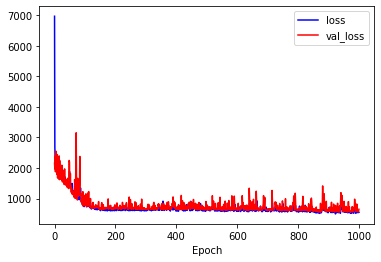

In [23]:
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r-', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [24]:
model.evaluate(xtest,ytest )

4/4 [==============================] - 0s 666us/step - loss: 658.8680


658.8679809570312

In [25]:
y_train_pred= model.predict(xtrain)
y_test_pred= model.predict(xtest)

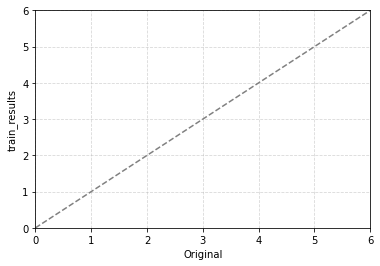

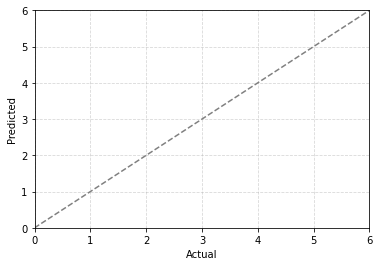

In [26]:
plt.plot([0,6],[0,6],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,6, 0,6])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,6],[0,6],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,6, 0,6])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()